# 7/27

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Text(0.5, 1.0, 'Heatmap of the Dateset')

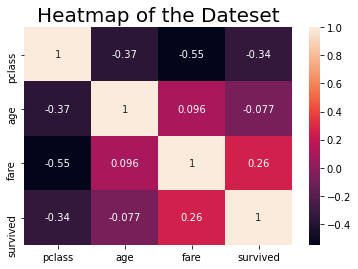

In [12]:
### 상관관계 히트맵으로 그리기
t_df = sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True) # annot 주석(칸 안에 숫자 표시됨)
plt.title('Heatmap of the Dateset', fontsize=20)

In [14]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                        aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

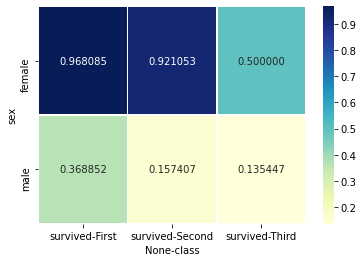

In [38]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu', #Y엘GnBu
           linewidth=.5,
           cbar=True)

# 7/28

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [41]:
# 빈도표
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'],tips['size']) # crosstab : 빈도표(count)
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [53]:
party_pv = pd.pivot_table(tips, index='day', columns='size', 
                          values='tip',aggfunc='count',fill_value=0)
party_pv

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [58]:
tips.pivot_table(index='day',columns='size',values='tip',aggfunc='count',fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [60]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [73]:
pc_25.sum(1) # sum(1) 괄호안에 1넣으면 행별 합
# pc_25.sum() # sum() 또는 sum(0)은 컬럼별 합

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [79]:
# pc_25 각 열방향 합계 1로 정규화
# pc_25.apply(lambda x : x/pc_25.sum(1))

pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [80]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

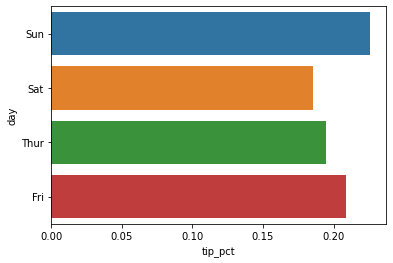

In [83]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
tips.head()

# party_pv1 = pd.pivot_table(tips, index='day', columns='size', 
#                           values='tip_pct',aggfunc='mean',fill_value=0)
# party_pv1.plot(kind='bar')

import seaborn as sns
# sns.barplot(x='tip_pct',y='day',data=tips, orient='h') ### orient : h(수평), 이게 디폴트인듯? / 수직은 v
# 막대 위에 줄은 신뢰구간
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', ci=None) # ci=None 하면 막대 위 줄(신뢰구간) 없어짐

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

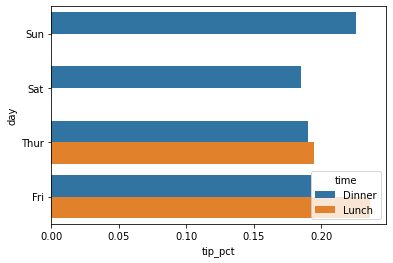

In [86]:
sns.barplot(x='tip_pct',y='day',hue = 'time', data=tips, orient='h', ci=None)

<AxesSubplot:xlabel='day', ylabel='tip_pct'>

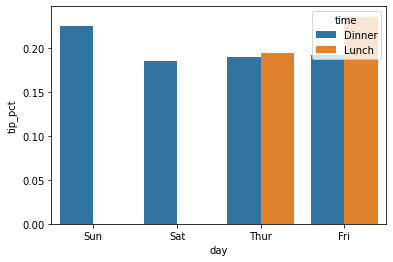

In [90]:
### 수직으로 그리기
sns.barplot(x='day',y='tip_pct',hue = 'time', data=tips, orient='v', ci=None)

<AxesSubplot:xlabel='size', ylabel='day'>

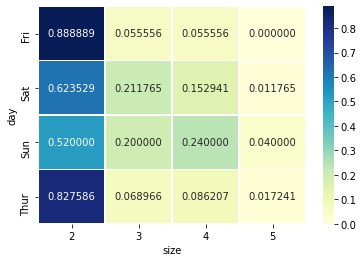

In [64]:
# # 요일별 팁의 비중을 시각화
sns.heatmap(pc_25.div(pc_25.sum(1),axis=0),
           annot=True, fmt='f',
           cmap='YlGnBu', #Y엘GnBu
           linewidth=.5,
           cbar=True)

<AxesSubplot:xlabel='size', ylabel='count'>

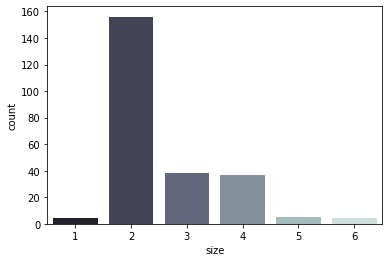

In [91]:
import warnings
warnings.filterwarnings('ignore')

# countplot() 개수 세기
sns.countplot('size',data=tips, palette='bone')

<AxesSubplot:xlabel='size', ylabel='count'>

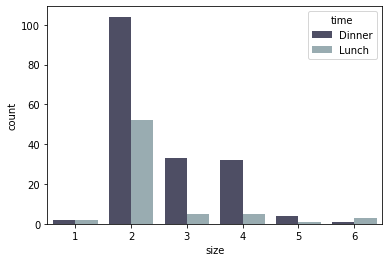

In [92]:
sns.countplot('size',data=tips, palette='bone',hue = 'time') # hue 추가

In [99]:
# np.random.normal(loc, scale, size) : 정규분포 난수 샘플
# 여기서 loc는 평균 / scale 은 표준편차
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2])) # 행방향으로 합침
values.describe()

count    400.000000
mean       4.984581
std        5.241777
min       -3.244242
25%        0.030773
50%        4.012038
75%        9.977211
max       14.803756
dtype: float64

<AxesSubplot:ylabel='Density'>

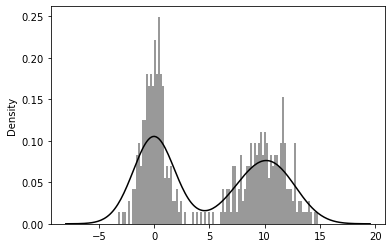

In [101]:
sns.distplot(values, bins=100, color='k') # distplot : 히스토그램

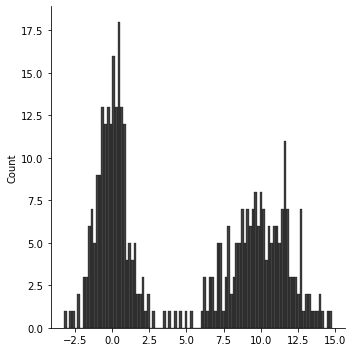

In [107]:
sns.displot(values, bins=100, color='k') 

<AxesSubplot:ylabel='Count'>

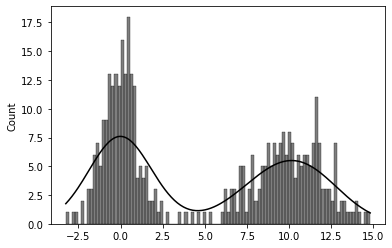

In [106]:
sns.histplot(values, bins=100, color='k', kde=True) # kde=True 하면 선도 나옴

In [93]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

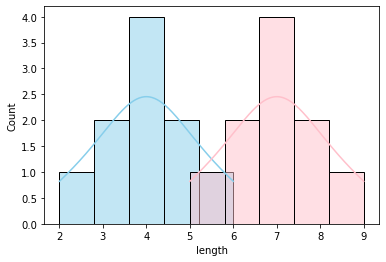

In [96]:
# hist plot
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='skyblue', kde=True)
sns.histplot(length_b, bins=5, color='pink', kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

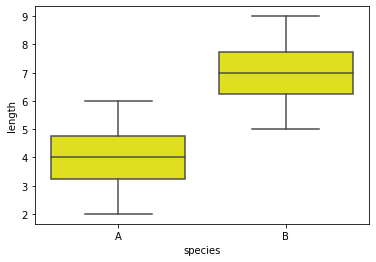

In [97]:
# box plot
sns.boxplot(x='species', y='length', data=fish_multi, color='yellow')

<AxesSubplot:xlabel='length'>

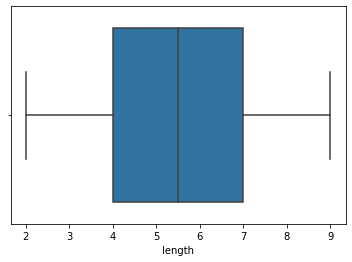

In [98]:
sns.boxplot('length',data=fish_multi)

<AxesSubplot:xlabel='species', ylabel='length'>

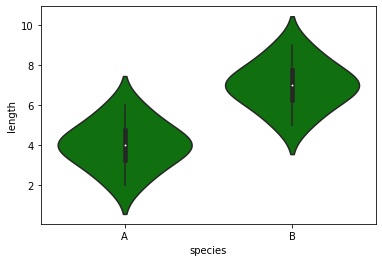

In [142]:
# 바이올린 plot
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species', y='length', data=fish_multi, color='g')
### box plot 에서 알 수 없는 분포에 대한 부분까지 알 수 있음

In [100]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


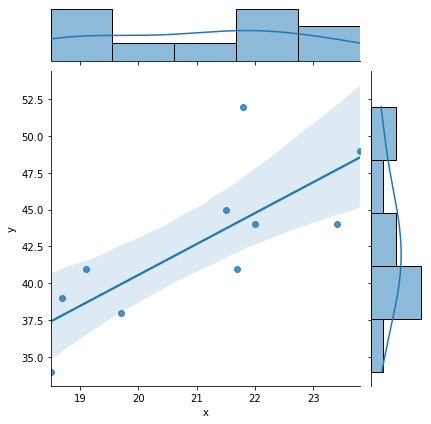

In [102]:
# jointplot 산점도 + 히스토그램
# sns.jointplot(cov_data.x,cov_data.y) 
sns.jointplot(cov_data.x,cov_data.y,kind='reg') 

# kind='reg' 의 reg는 회귀선 추가. (산점도를 가장 잘 반영한 선(오차를 최소화한 선))
# 위에 히스토그램 위 선은 커널 밀도함수

In [103]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


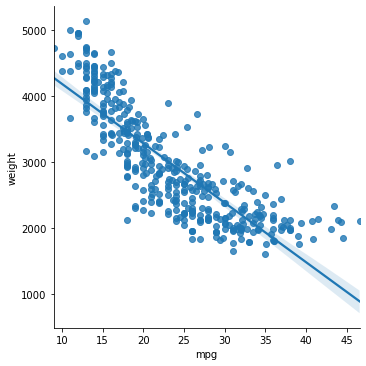

In [104]:
# lmplot 산점도 + line(산점도간의 오차가 최소가 되는 선)
sns.lmplot(x='mpg',y='weight',data=df_auto)

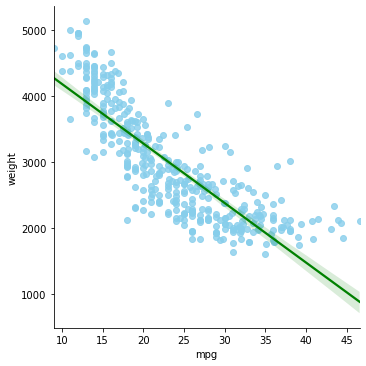

In [105]:
# 옵션주기
sns.lmplot(x='mpg',y='weight',data=df_auto, scatter_kws={'color':'skyblue'},
          line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

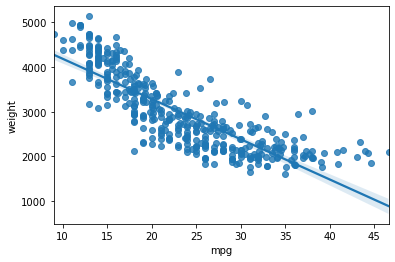

In [163]:
# regplot 과 lmplot 동일
sns.regplot(x='mpg',y='weight',data=df_auto) # regplot : 회귀 regression

<AxesSubplot:xlabel='mpg', ylabel='weight'>

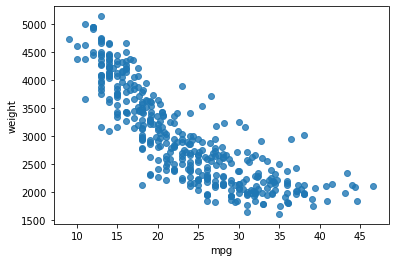

In [178]:
# regplot 옵션
sns.regplot(x='mpg',y='weight',data=df_auto, fit_reg=False) # regplot : 회귀 regression
# fit_reg=False 회귀선 없어짐 / default : fig_reg=True 

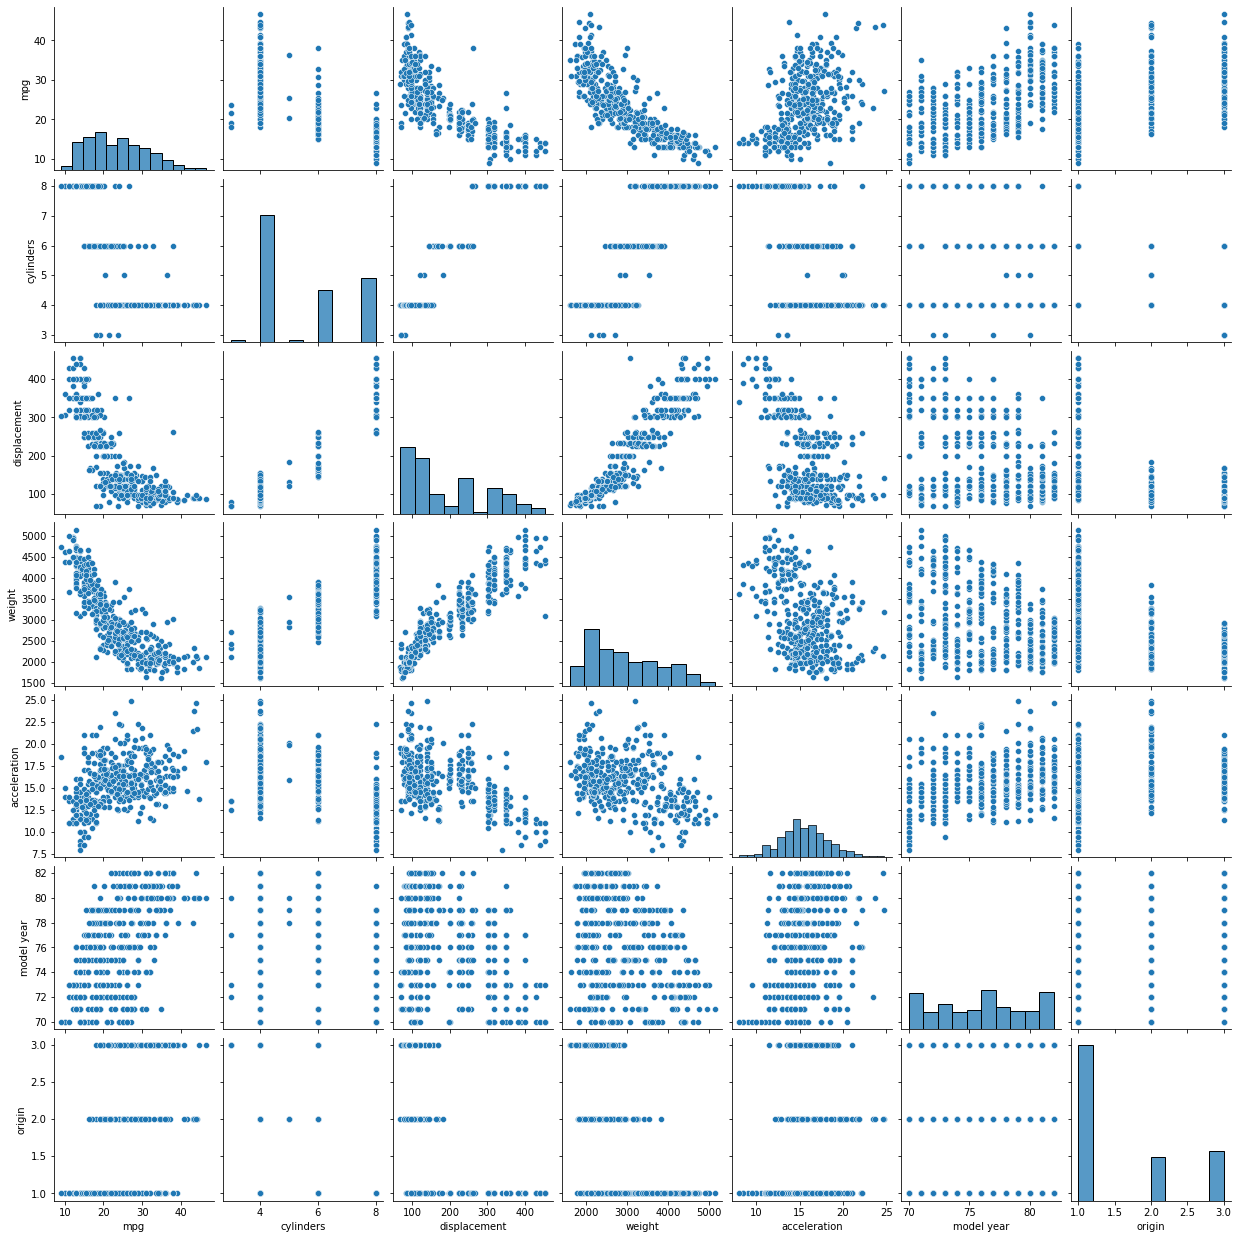

In [203]:
sns.pairplot(df_auto,palette='rainbow')

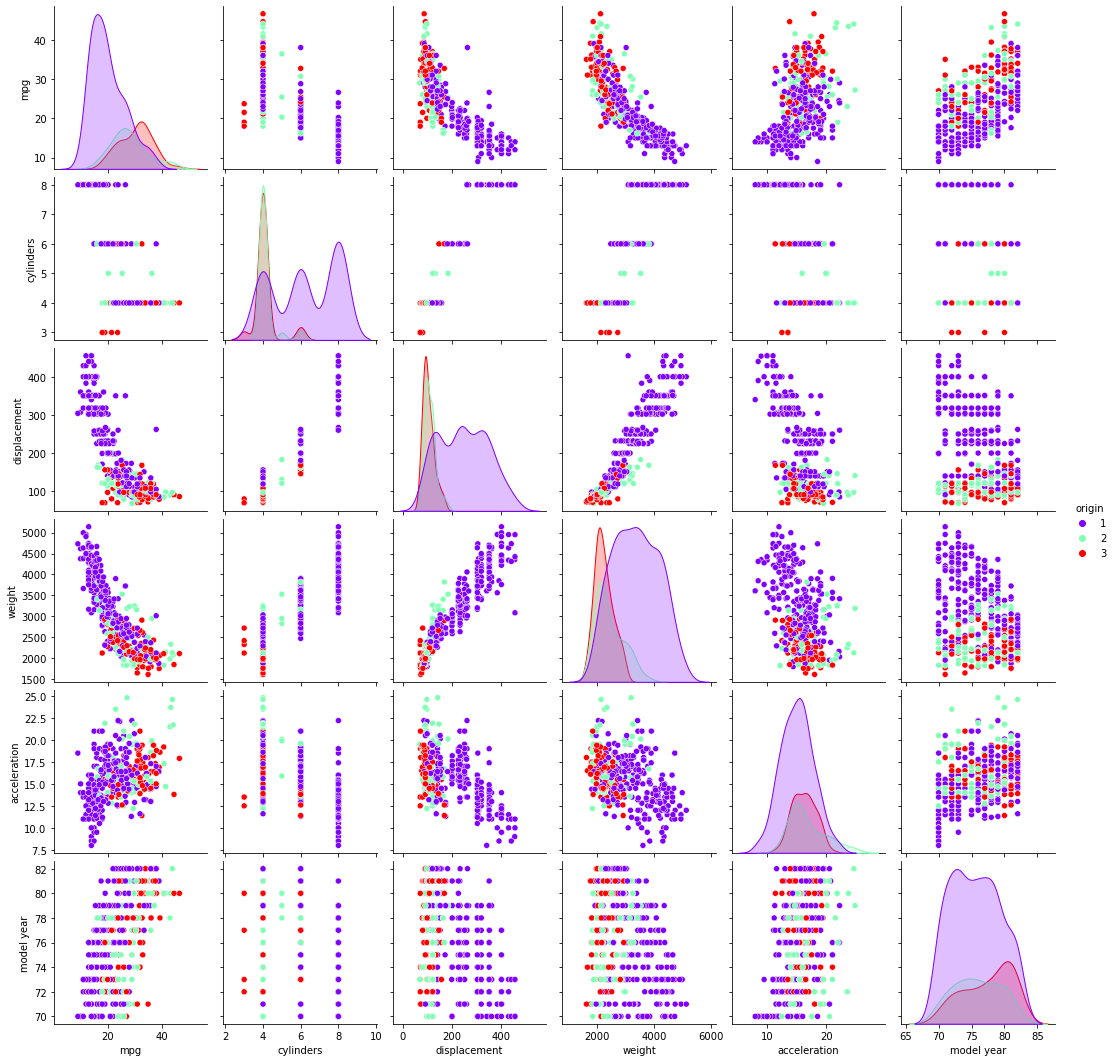

In [204]:
sns.pairplot(df_auto,palette='rainbow',hue='origin')
#,diag_kind ='hist' 붙이면 대각선 히스토그램 생김

In [205]:
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])

<AxesSubplot:ylabel='Count'>

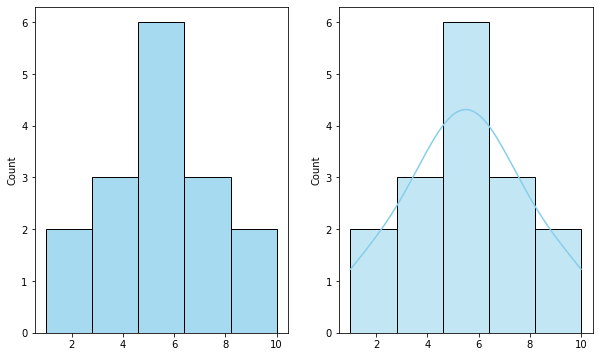

In [212]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data, color='skyblue',kde=False, ax=ax1)
sns.histplot(fish_data, color='skyblue',kde=True, ax=ax2)
### matplotlib & seaborn 같이 활용